In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,recall_score,precision_score, f1_score,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [2]:
#reading data from .csv file into dataframe
dataset = pd.read_csv("diabetes.csv")
#print(dataset)
dataset['Diabetes'] = dataset['diabetes'].apply(lambda x: 1 if x== 'Diabetes' else 0)
dataset = dataset.drop('diabetes', axis= 'columns')
#dataset.head(5)

In [3]:
#gender columnn has string, replaced it 0 (male) and 1(female)
dummies = pd.get_dummies(dataset.gender)
#print(dummies)
dataset = pd.concat([dataset, dummies], axis = 'columns')
dataset.drop('gender', axis ='columns', inplace=True)
y = dataset['Diabetes']
X = dataset.drop('Diabetes', axis= 'columns')
#print(X.head(5))
#print(y.head(5))

In [4]:
#checking if any cloumn consists of null value
X.columns[X.isna().any()]



Index([], dtype='object')

In [5]:
#spliting into training and test data
X_train, X_test , y_train, y_test  = train_test_split(X, y, train_size= 0.80, shuffle= True)
#print(X_train)
#print(y_train)


In [6]:
#creating, training Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [7]:
#testing
y_pred = model.predict(X_test)
# df = pd.da
# print(y_pred.apply(lambda x: 1 if x== 'Diabetes' else 0))
#print(y_test.shape, y_pred.shape)


In [8]:
#model accuracy
print("Testing Accuracy ", accuracy_score(y_test, y_pred))


Testing Accuracy  0.8333333333333334


F1 score:  0.6666666666666667
Recall score:  0.8333333333333334
Precision score:  0.8333333333333334
Confusion Matrix:  [[52  9]
 [ 4 13]]
Visulization of confusion matrix


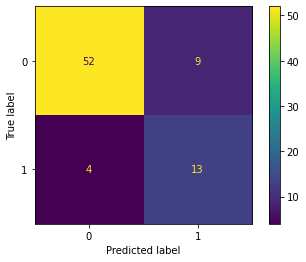

In [9]:
print("F1 score: ",f1_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred, average='micro'))
print("Precision score: ", precision_score(y_test, y_pred, average='micro'))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cm)
print("Visulization of confusion matrix")
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()